In [ ]:
#PCA - wine.csv

In [ ]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid',palette='rainbow')
%matplotlib inline

In [ ]:
#Read the Dataset
df = pd.read_csv('https://raw.githubusercontent.com/KJanhavi2424/My-Datasets/main/wine.csv')
df

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0             0.28             2.29   5.64  1.04      3.92     1065  
1             0.26             1.28   4.38  1.05      3.40     1050  
2             0.30             2.81   5.68  1.03      3.17     1185  
3             0.24             2.18   7.80  0.86      3.45     1480  
4             0.39             1.82   4.32  1.04      2.93      735  
..             ...              ...    ...   ...       ...      ...  
173           0.52             1.06   7.70  0.64      1.74      740  
174           0.43             1.41   7.30  0.70      1.56      750  
175           0.43             1.35  10.20  0.59      1.56      835  
176           0.53             1.46   9.30  0.60      1.62      840  
177           0.56             1.35   9.20  0.61      1.60      560  

[178 rows x 14 columns]

In [ ]:
df['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [ ]:
df.shape

(178, 14)

In [ ]:
# Converting data to numpy array
df_ary=df.values
df_ary

array([[1.000e+00, 1.423e+01, 1.710e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.000e+00, 1.320e+01, 1.780e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.000e+00, 1.316e+01, 2.360e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [3.000e+00, 1.327e+01, 4.280e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [3.000e+00, 1.317e+01, 2.590e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [3.000e+00, 1.413e+01, 4.100e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [ ]:
# Normalizing the numerical data
df_norm=scale(df_ary)
df_norm

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [ ]:
df.describe()

Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.124453         0.572359    2.318286   
min      0.980000    0.340000       0.130000         0.410000    1.280000   
25%      1.742500    1.205000       0.270000         1.250000    3.220000   
50%      2.355000    2.135000       0.340000         1.555000    4.690000   
75%      2.800000    2.875000       0.437500         1.950000    6.200000   
max      3.880000    5.080000       0.660000         3.580000   13.000000   

              Hue    Dilution      Proline  
count  178.000000  178.000000   178.000000  
mean     0.957449    2.611685   746.893258  
std      0.228572    0.709990   314.907474  
min      0.480000    1.270000   278.000000  
25%      0.782500    1.937500   500.500000  
50%      0.965000    2.780000   673.500000  
75%      1.120000    3.170000   985.000000  
max      1.710000    4.000000  1680.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [ ]:
sns.pairplot(df)
plt.tight_layout()
plt.show()

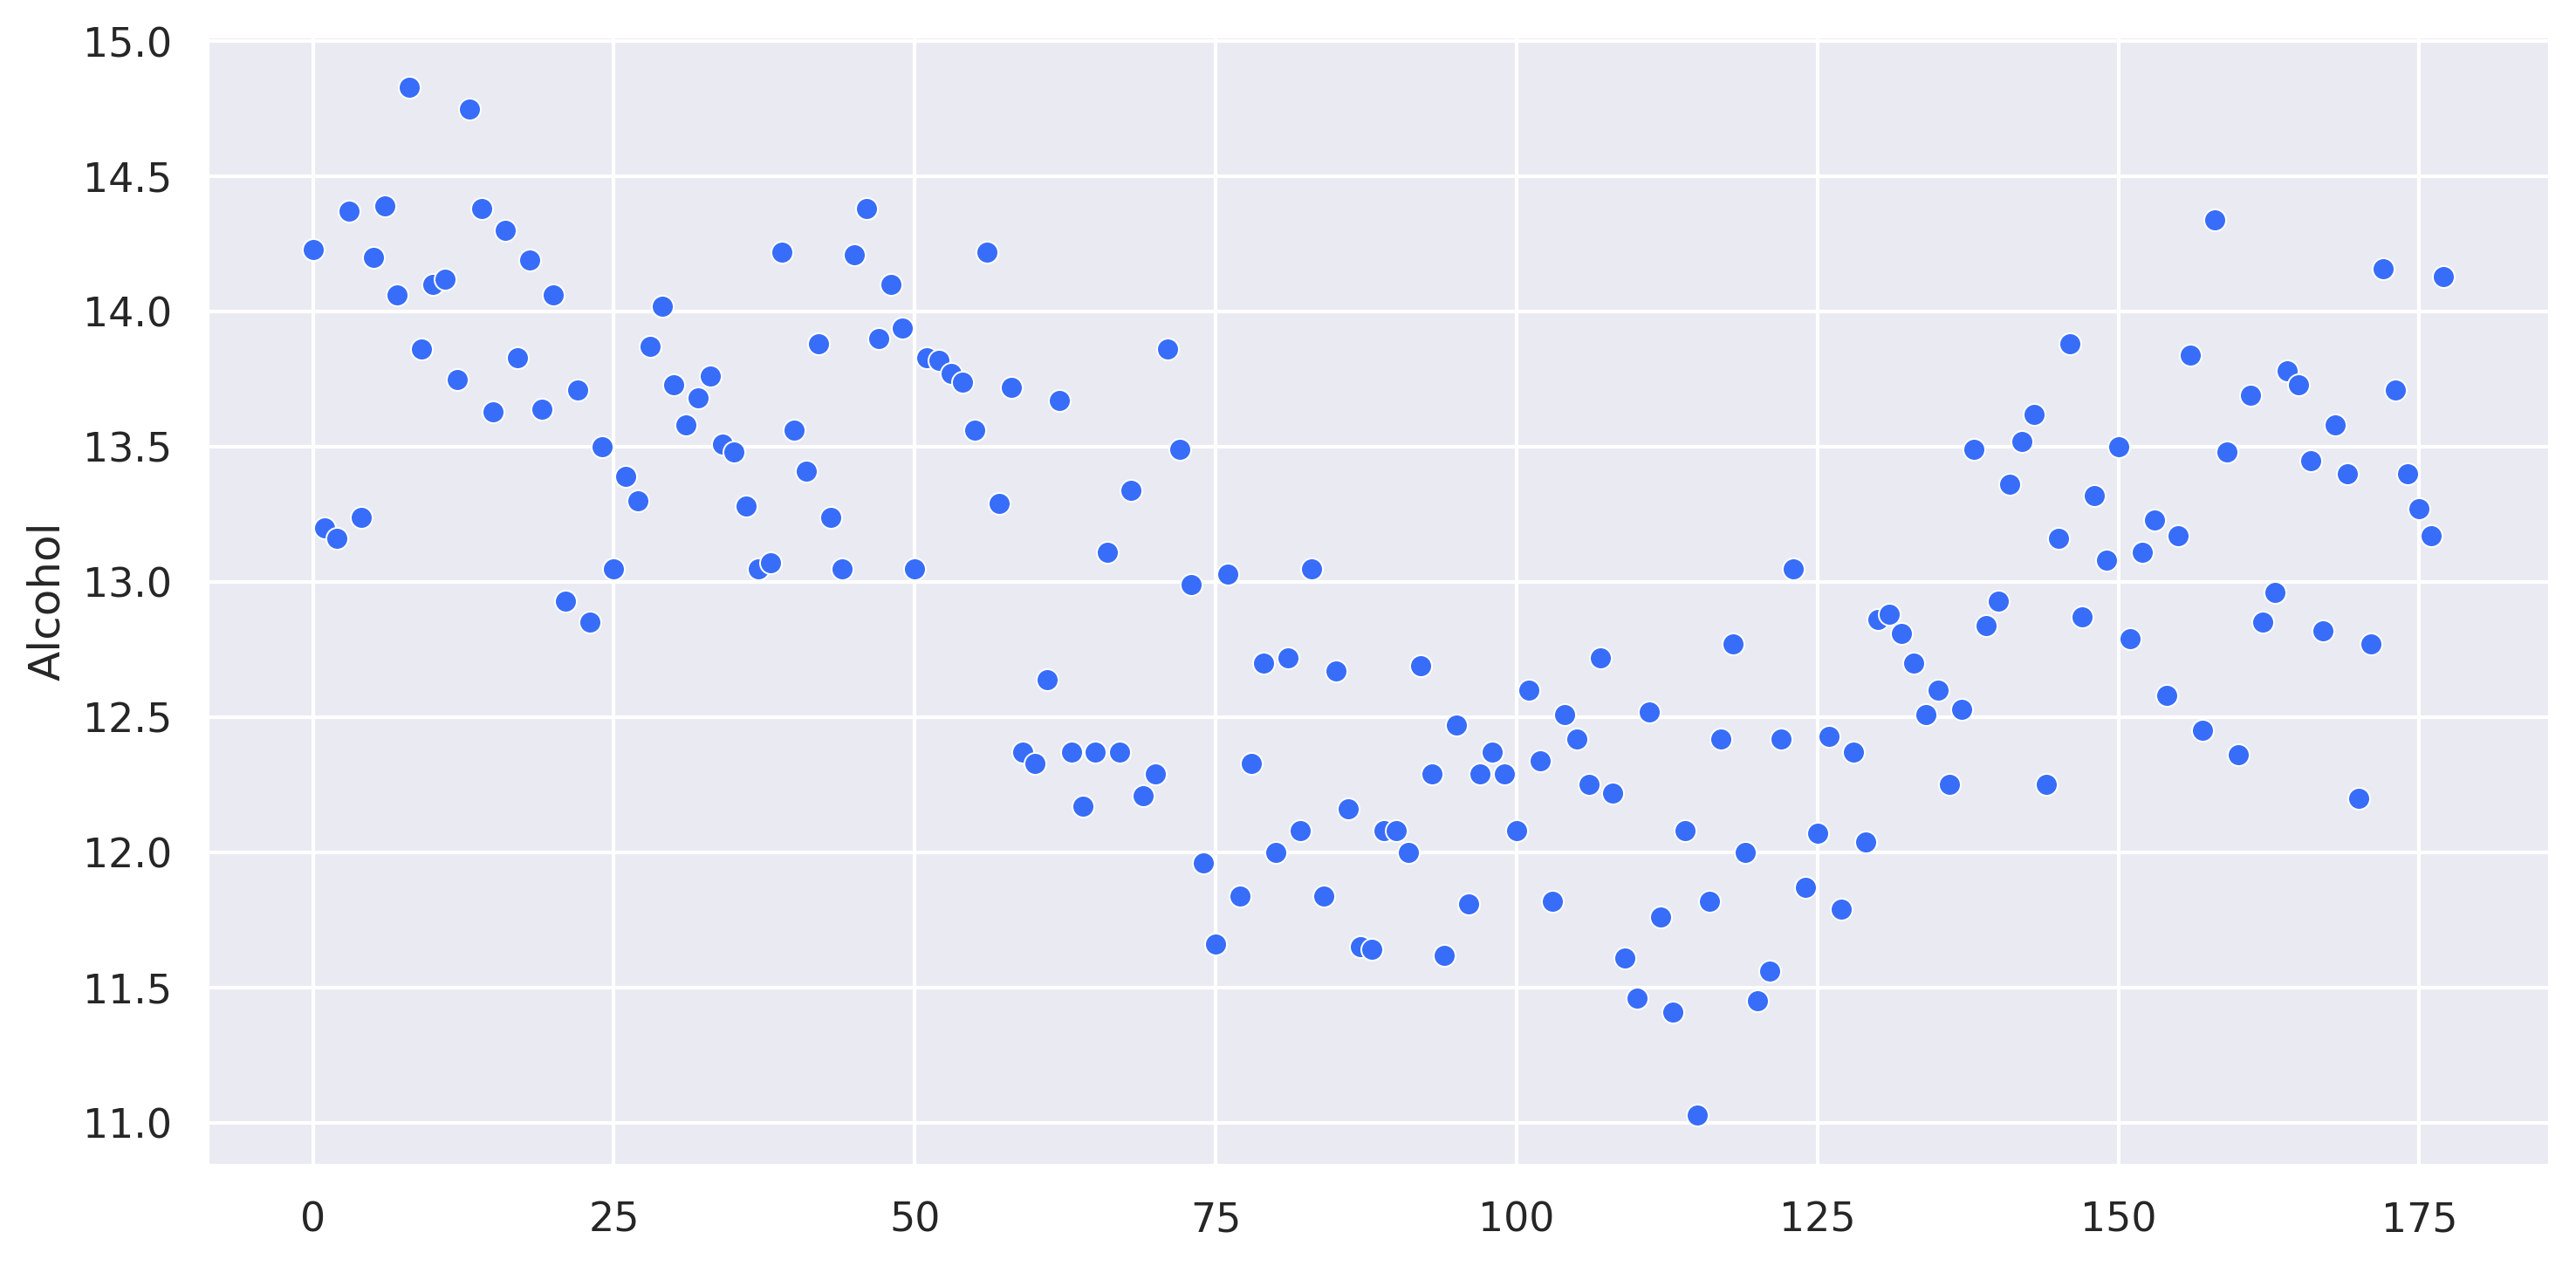

In [ ]:
sns.scatterplot(df['Alcohol'])
plt.tight_layout()
plt.show()

In [ ]:
x = df.iloc[:,:-1]
y = df['Alcohol']

In [ ]:
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.25171685,
         0.36217728,  1.84791957],
       [-1.21394365,  0.24628963, -0.49941338, ..., -0.29332133,
         0.40605066,  1.1134493 ],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.26901965,
         0.31830389,  0.78858745],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ...,  2.22423597,
        -1.61212515, -1.48544548],
       [ 1.37386437,  0.20923168,  0.22769377, ...,  1.83492299,
        -1.56825176, -1.40069891],
       [ 1.37386437,  1.39508604,  1.58316512, ...,  1.79166599,
        -1.52437837, -1.42894777]])

In [ ]:
pca = PCA()
pcs = pca.fit_transform(x)
pd.DataFrame(pcs)

0         1         2         3         4         5         6   \
0   -3.260580  1.736054 -0.405701  0.687419  0.200386 -0.359880  0.632731   
1   -2.358620 -0.509786 -1.937094  0.080793 -0.530808 -0.934456  0.010388   
2   -2.453376  1.120704  0.892834 -0.782643  0.378624  0.569583  0.415002   
3   -3.253148  2.686416 -0.411249 -0.555531  0.087066  0.271407 -0.414701   
4   -1.403734  1.320100  1.854434  0.503217 -0.285707 -0.666474  0.515031   
..        ...       ...       ...       ...       ...       ...       ...   
173  3.886054  1.707484 -0.443465 -1.264981 -0.032341 -1.103732  0.851965   
174  3.148970  1.386257  0.127645 -0.165248  0.457328 -0.006777  0.108374   
175  3.384134  2.255285 -1.133039  0.505402  1.098278  0.071138  0.708909   
176  3.078204  1.791104 -0.639500  1.109167  0.294664  1.019720  0.737921   
177  3.639361  2.658658  0.746931 -0.879384 -0.654778  0.297848  0.063203   

           7         8         9         10        11        12  
0    0.046907 -0.820645  0.618012  0.465836  0.486805  0.294675  
1   -1.011932 -0.112133 -0.187387  0.378904  0.182328  0.105390  
2    0.114857 -0.576821 -0.922386  0.033796 -0.115035 -0.161369  
3   -0.644758  0.281428  0.626387 -0.178538  0.324122 -0.197160  
4   -0.347955 -0.184441 -0.123972 -0.269699 -0.190014 -0.338264  
..        ...       ...       ...       ...       ...       ...  
173  0.215097  0.414076 -0.093161  0.177757  0.181033  0.034659  
174  0.530442  0.253675 -0.026677 -0.250032  0.086710 -0.127952  
175 -0.072243  0.348921  0.155599  0.748714 -0.218622 -0.075851  
176 -0.440155 -0.289070  0.444341  0.366244  0.076042  0.035184  
177  0.436751  0.158851  0.291934 -0.244888  0.241734 -0.165170  

[178 rows x 13 columns]

In [ ]:
pca.explained_variance_ratio_

array([0.3996507 , 0.16770494, 0.10920338, 0.0683296 , 0.06528109,
       0.05148865, 0.04248671, 0.02680753, 0.02028839, 0.01995798,
       0.01304329, 0.01042324, 0.00533449])

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.3996507 , 0.56735564, 0.67655902, 0.74488863, 0.81016972,
       0.86165837, 0.90414508, 0.93095261, 0.951241  , 0.97119898,
       0.98424227, 0.99466551, 1.        ])

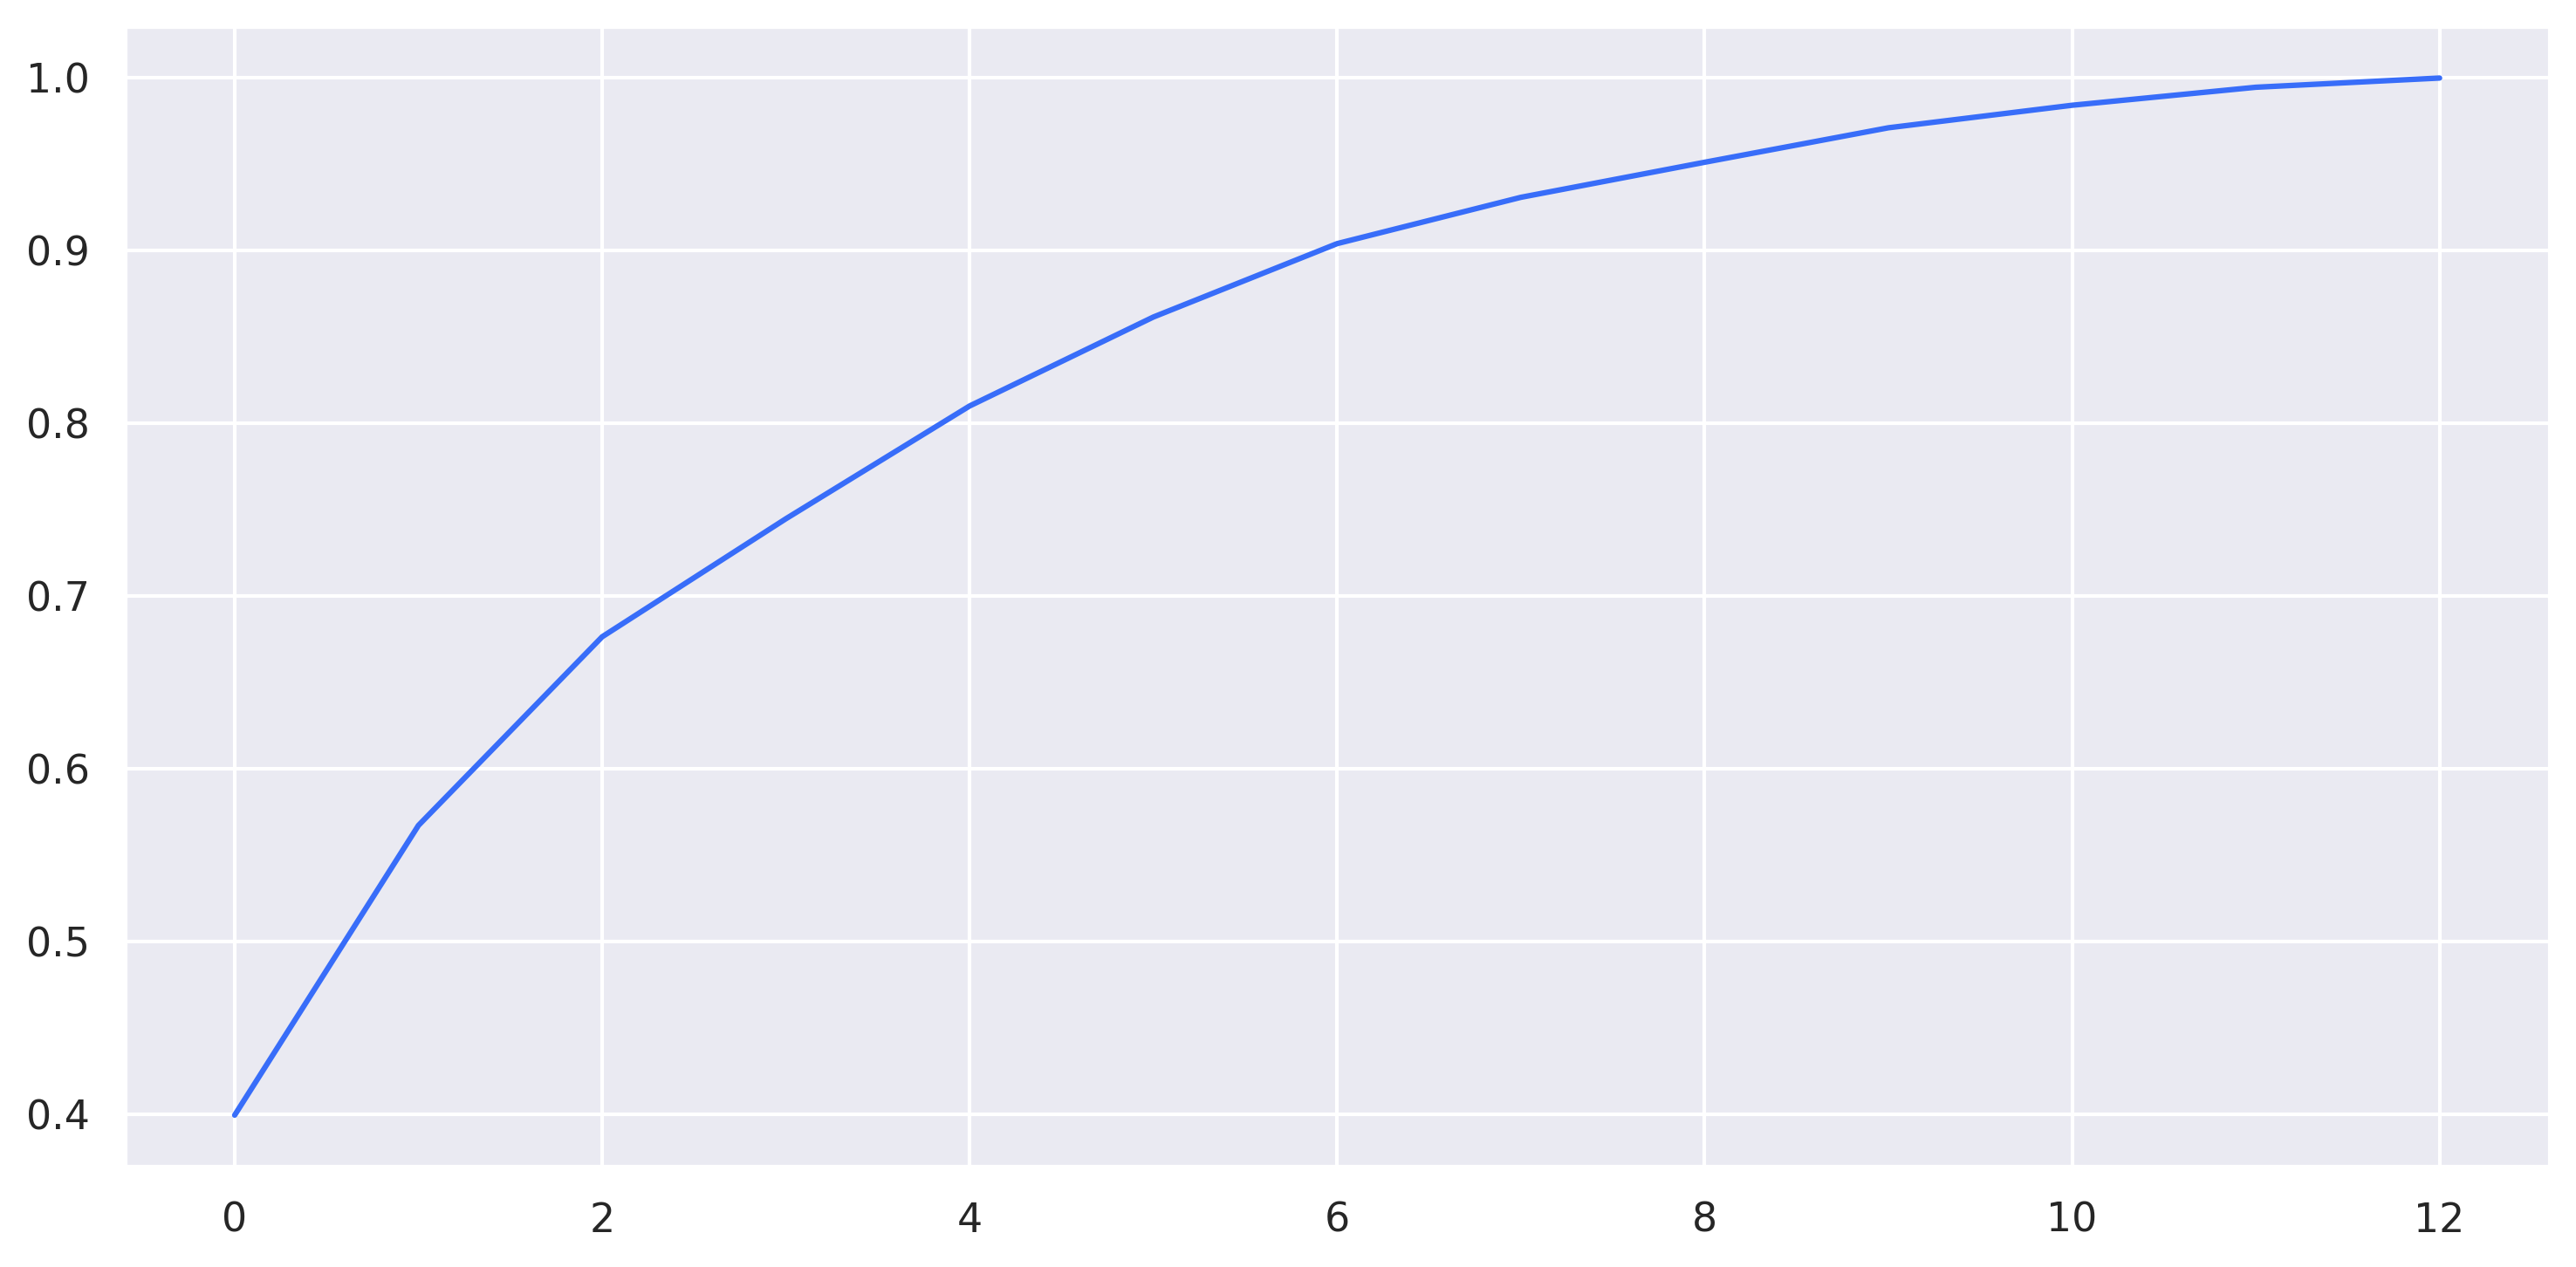

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.tight_layout()
plt.show()

In [ ]:
pca = PCA(n_components=7)
pcs = pca.fit_transform(x)
x = pd.DataFrame(pcs,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7'])

In [ ]:
x

pc1       pc2       pc3       pc4       pc5       pc6       pc7
0   -3.260580  1.736054 -0.405701  0.687419  0.200386 -0.359880  0.632731
1   -2.358620 -0.509786 -1.937094  0.080793 -0.530808 -0.934456  0.010388
2   -2.453376  1.120704  0.892834 -0.782643  0.378624  0.569583  0.415002
3   -3.253148  2.686416 -0.411249 -0.555531  0.087066  0.271407 -0.414701
4   -1.403734  1.320100  1.854434  0.503217 -0.285707 -0.666474  0.515031
..        ...       ...       ...       ...       ...       ...       ...
173  3.886054  1.707484 -0.443465 -1.264981 -0.032341 -1.103732  0.851965
174  3.148970  1.386257  0.127645 -0.165248  0.457328 -0.006777  0.108374
175  3.384134  2.255285 -1.133039  0.505402  1.098278  0.071138  0.708909
176  3.078204  1.791104 -0.639500  1.109167  0.294664  1.019720  0.737921
177  3.639361  2.658658  0.746931 -0.879384 -0.654778  0.297848  0.063203

[178 rows x 7 columns]

In [ ]:
y

0      14.23
1      13.20
2      13.16
3      14.37
4      13.24
       ...  
173    13.71
174    13.40
175    13.27
176    13.17
177    14.13
Name: Alcohol, Length: 178, dtype: float64

Text(0.5, 1.0, 'Scree Plot')

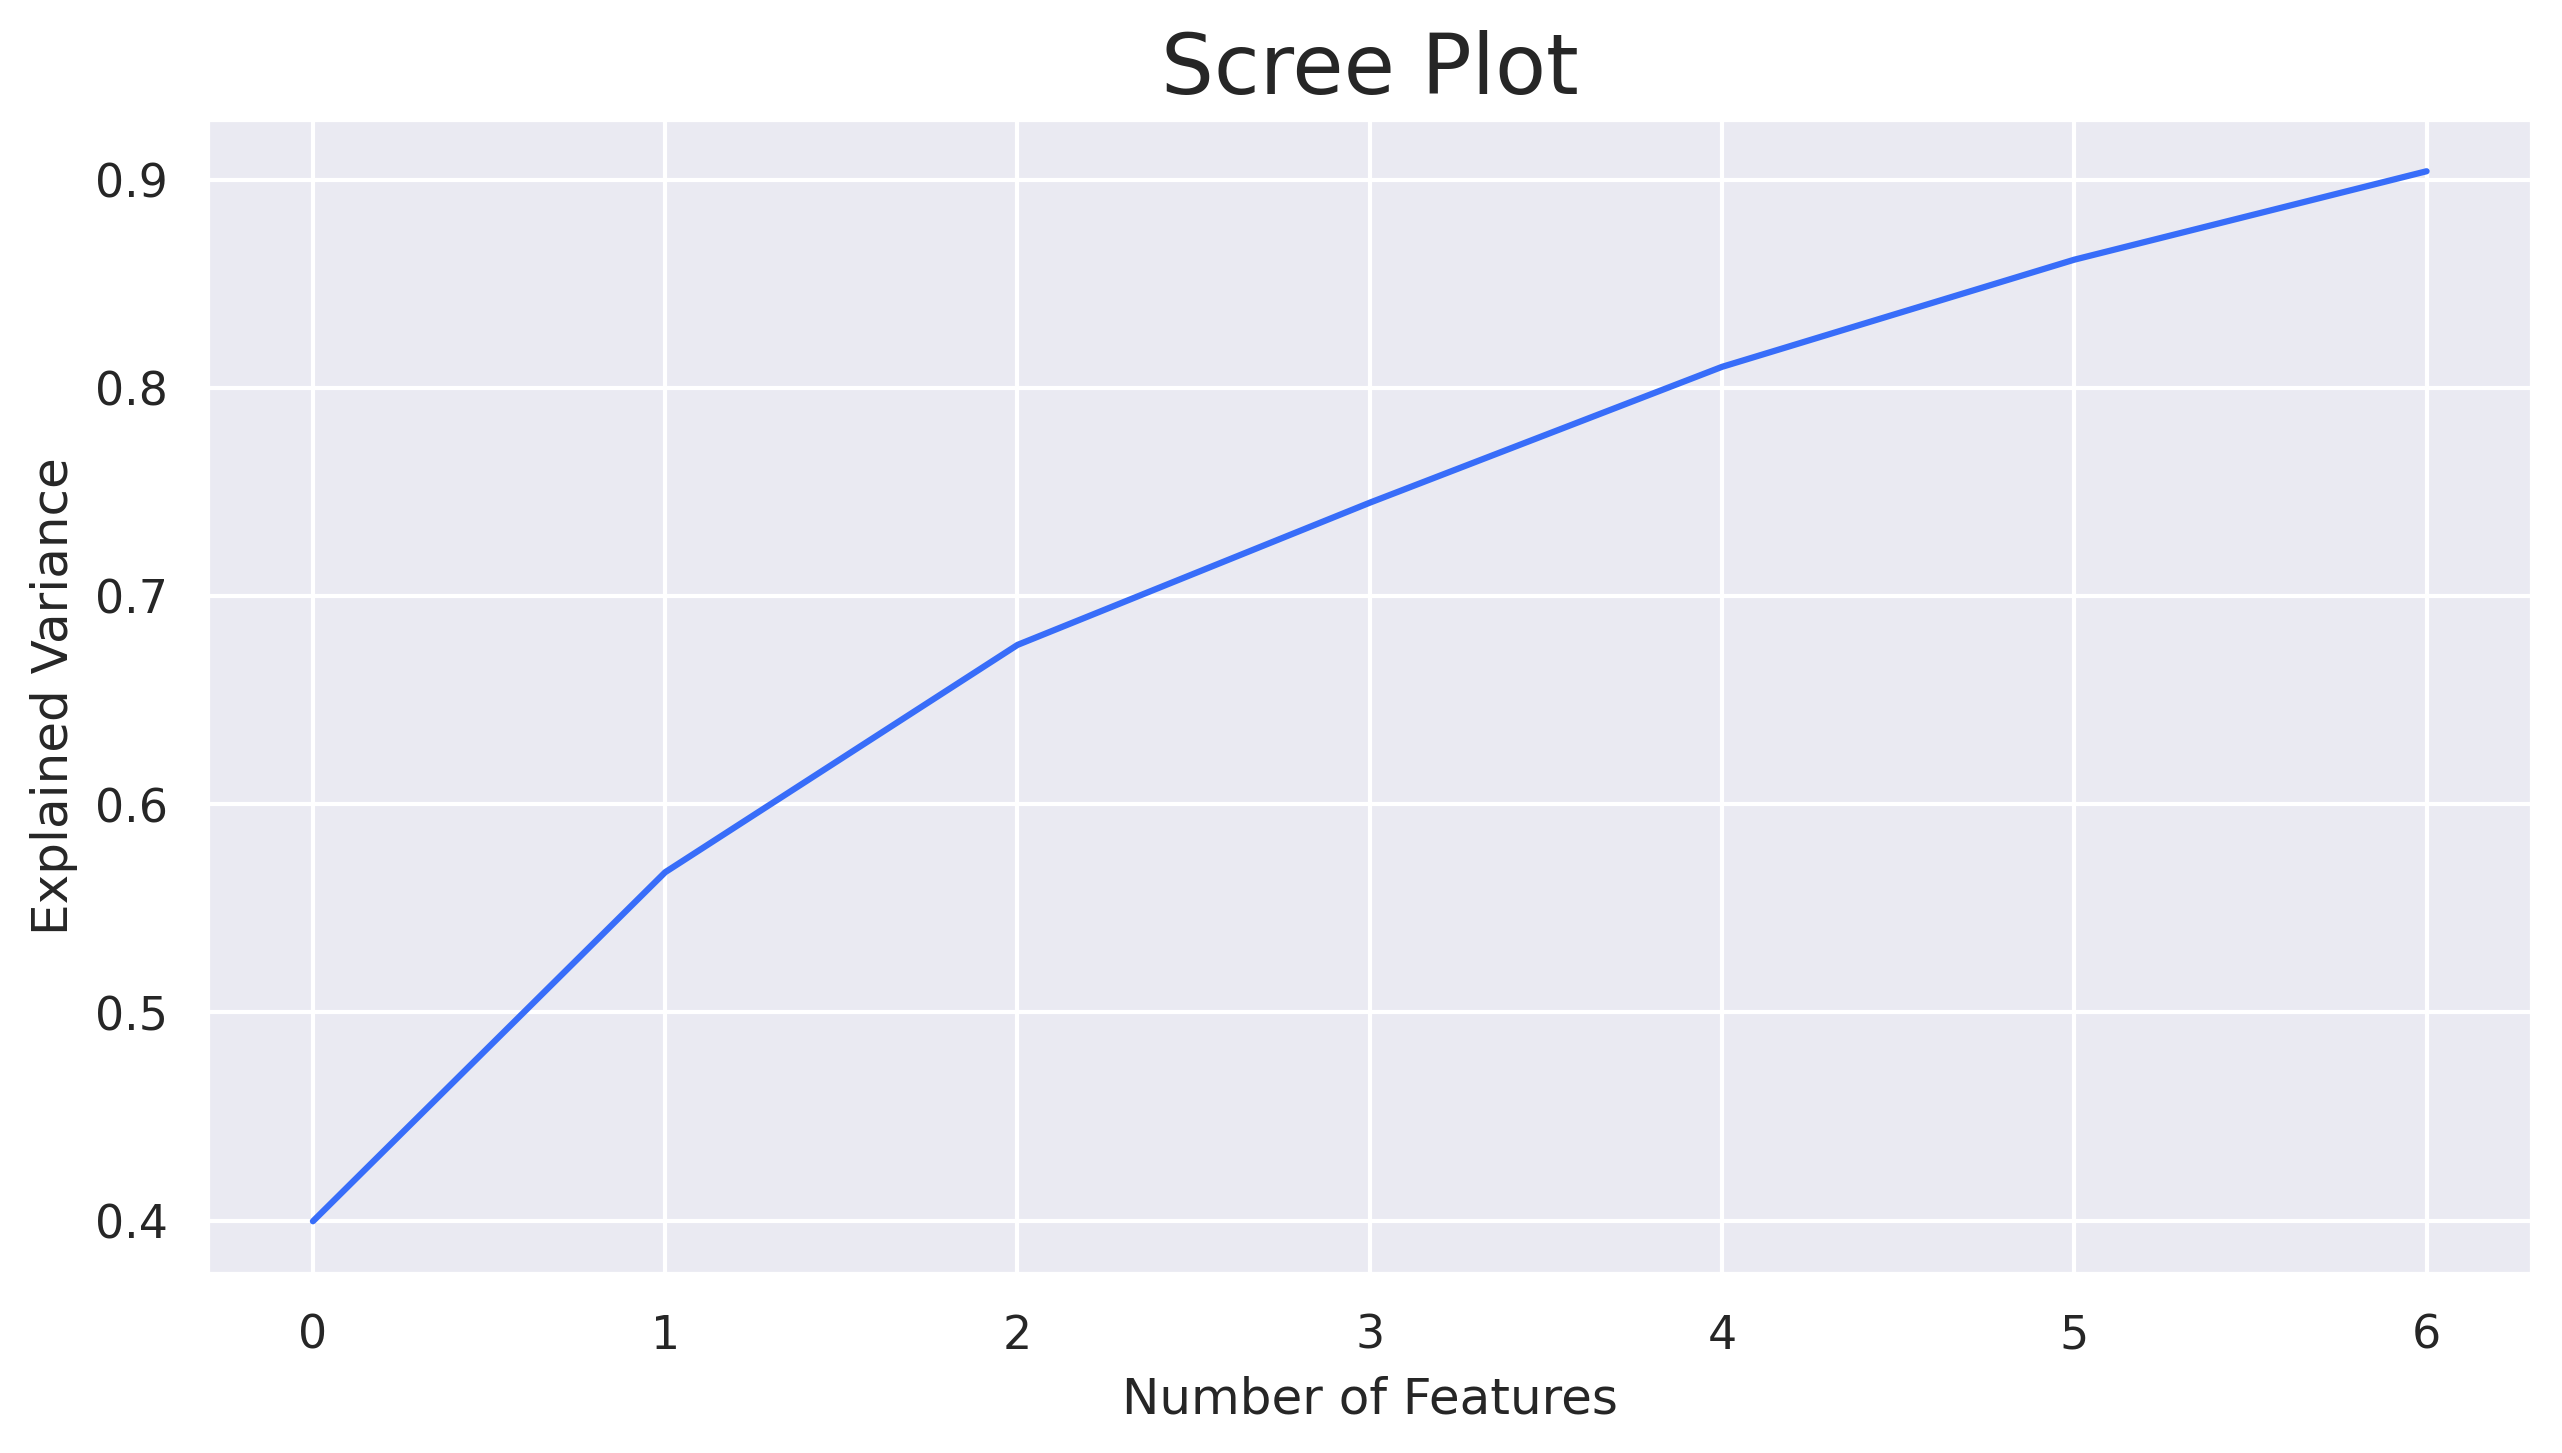

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Features')
plt.ylabel('Explained Variance')
plt.title('Scree Plot',size=20)

In [ ]:
#Hierarchical Clustering

In [ ]:
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering

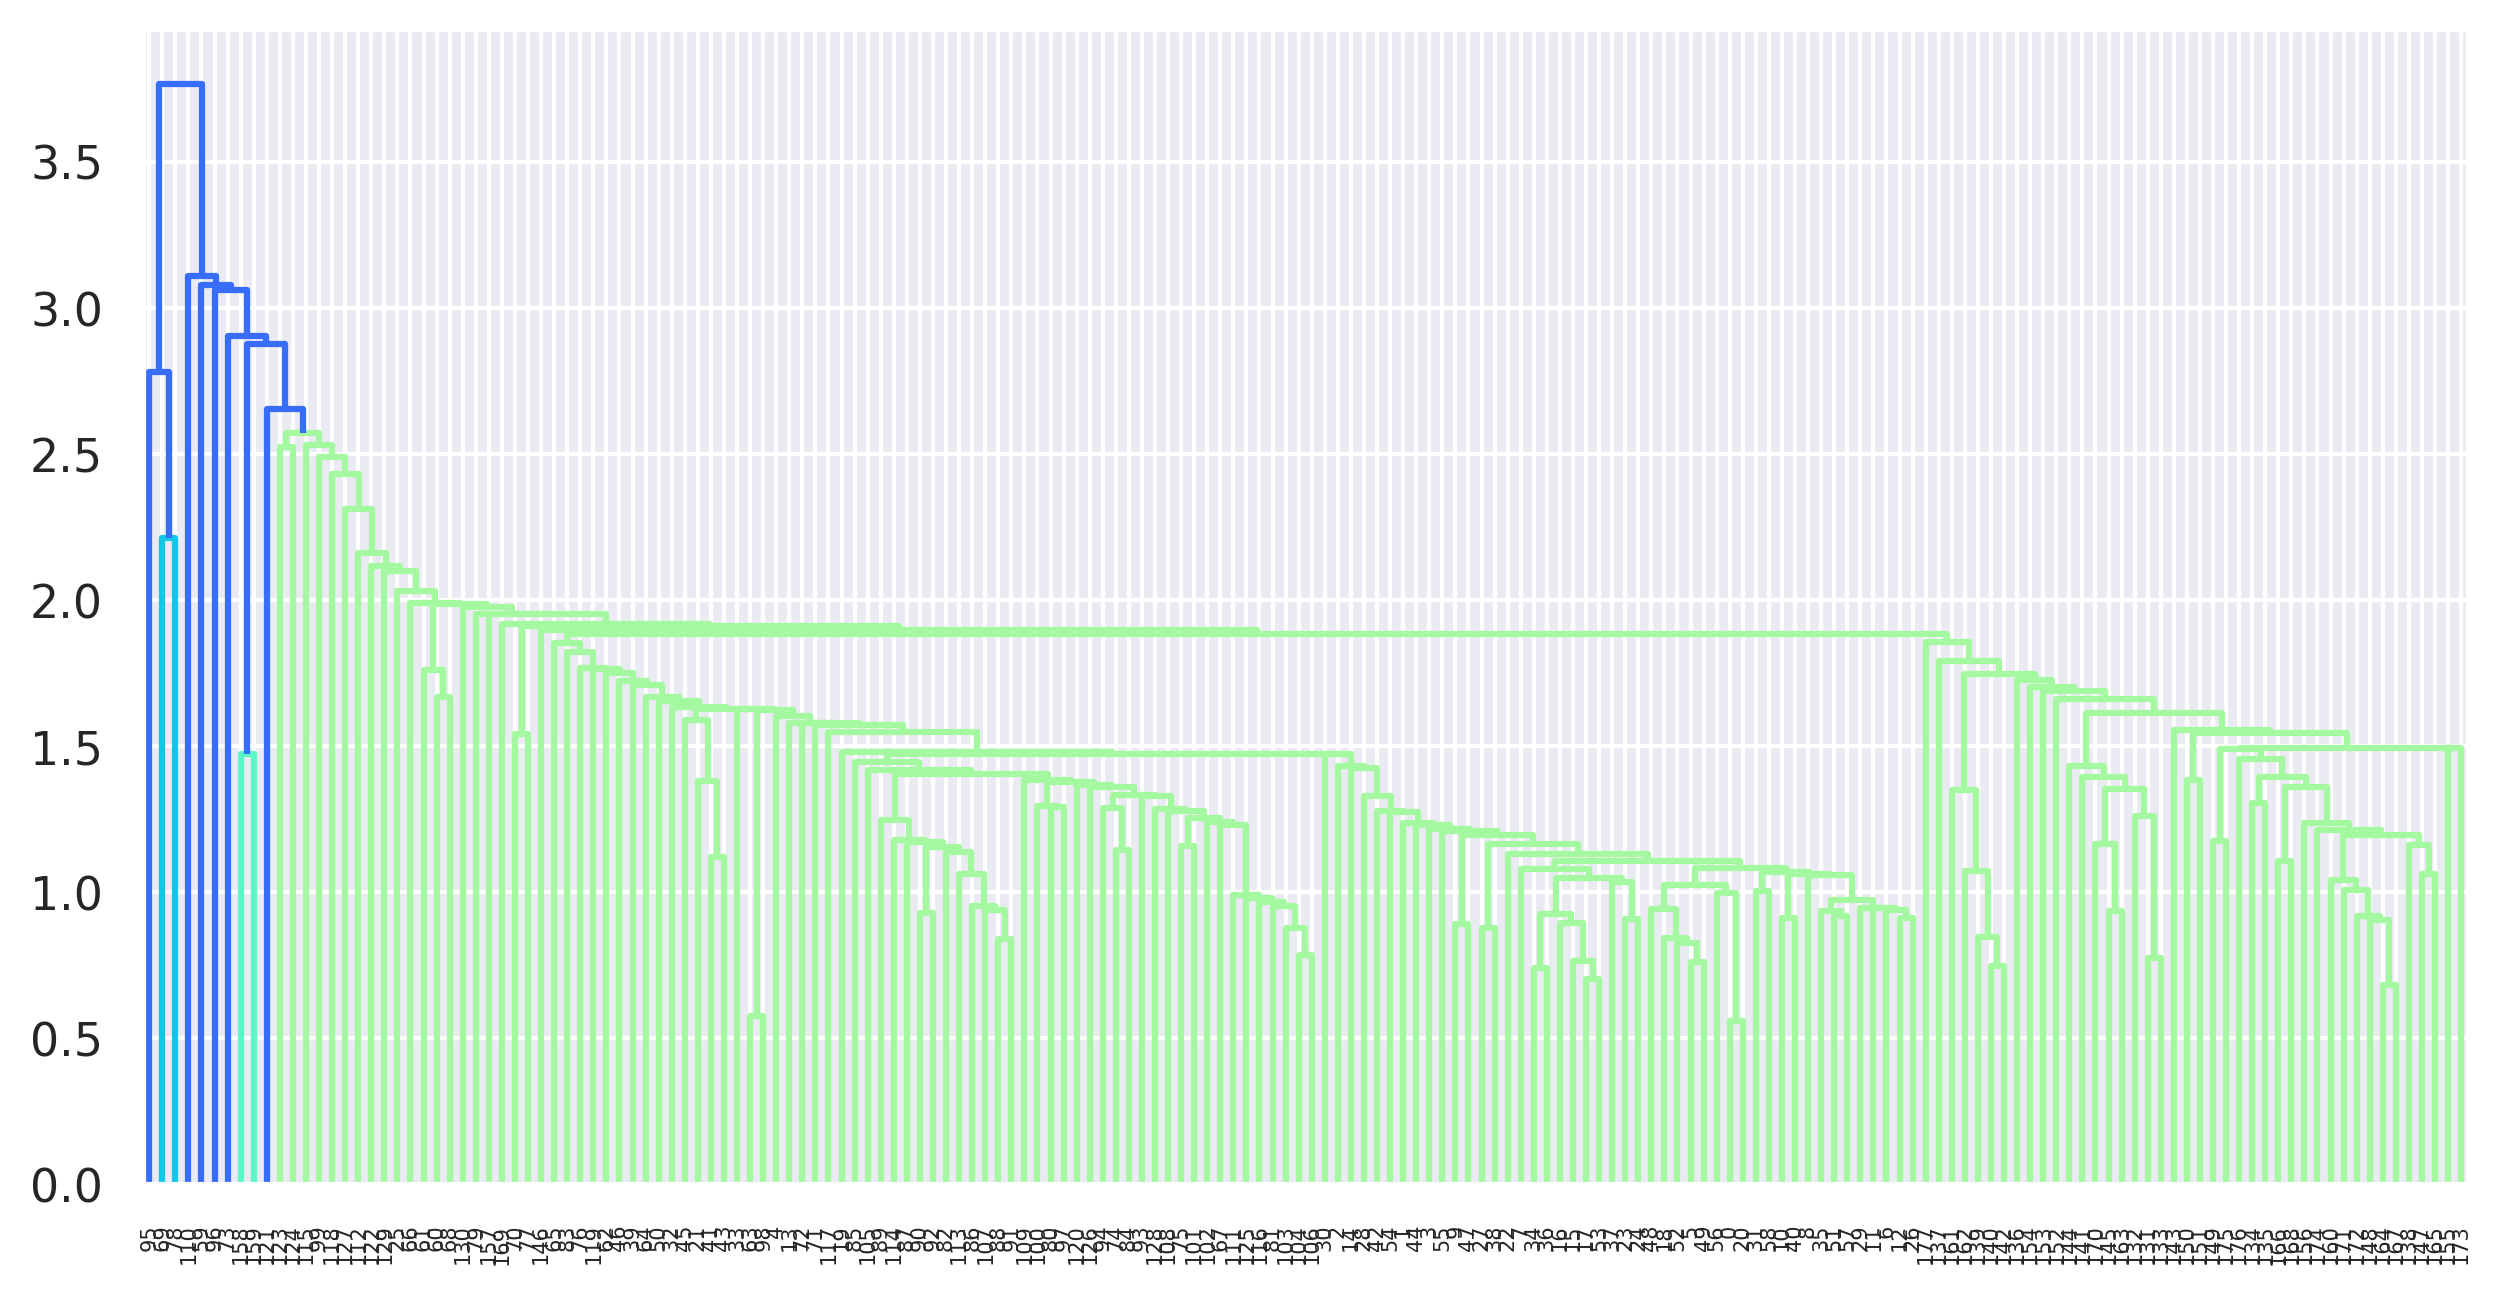

In [ ]:
lk = hierarchy.linkage(x,method='single')
dendro = hierarchy.dendrogram(lk)

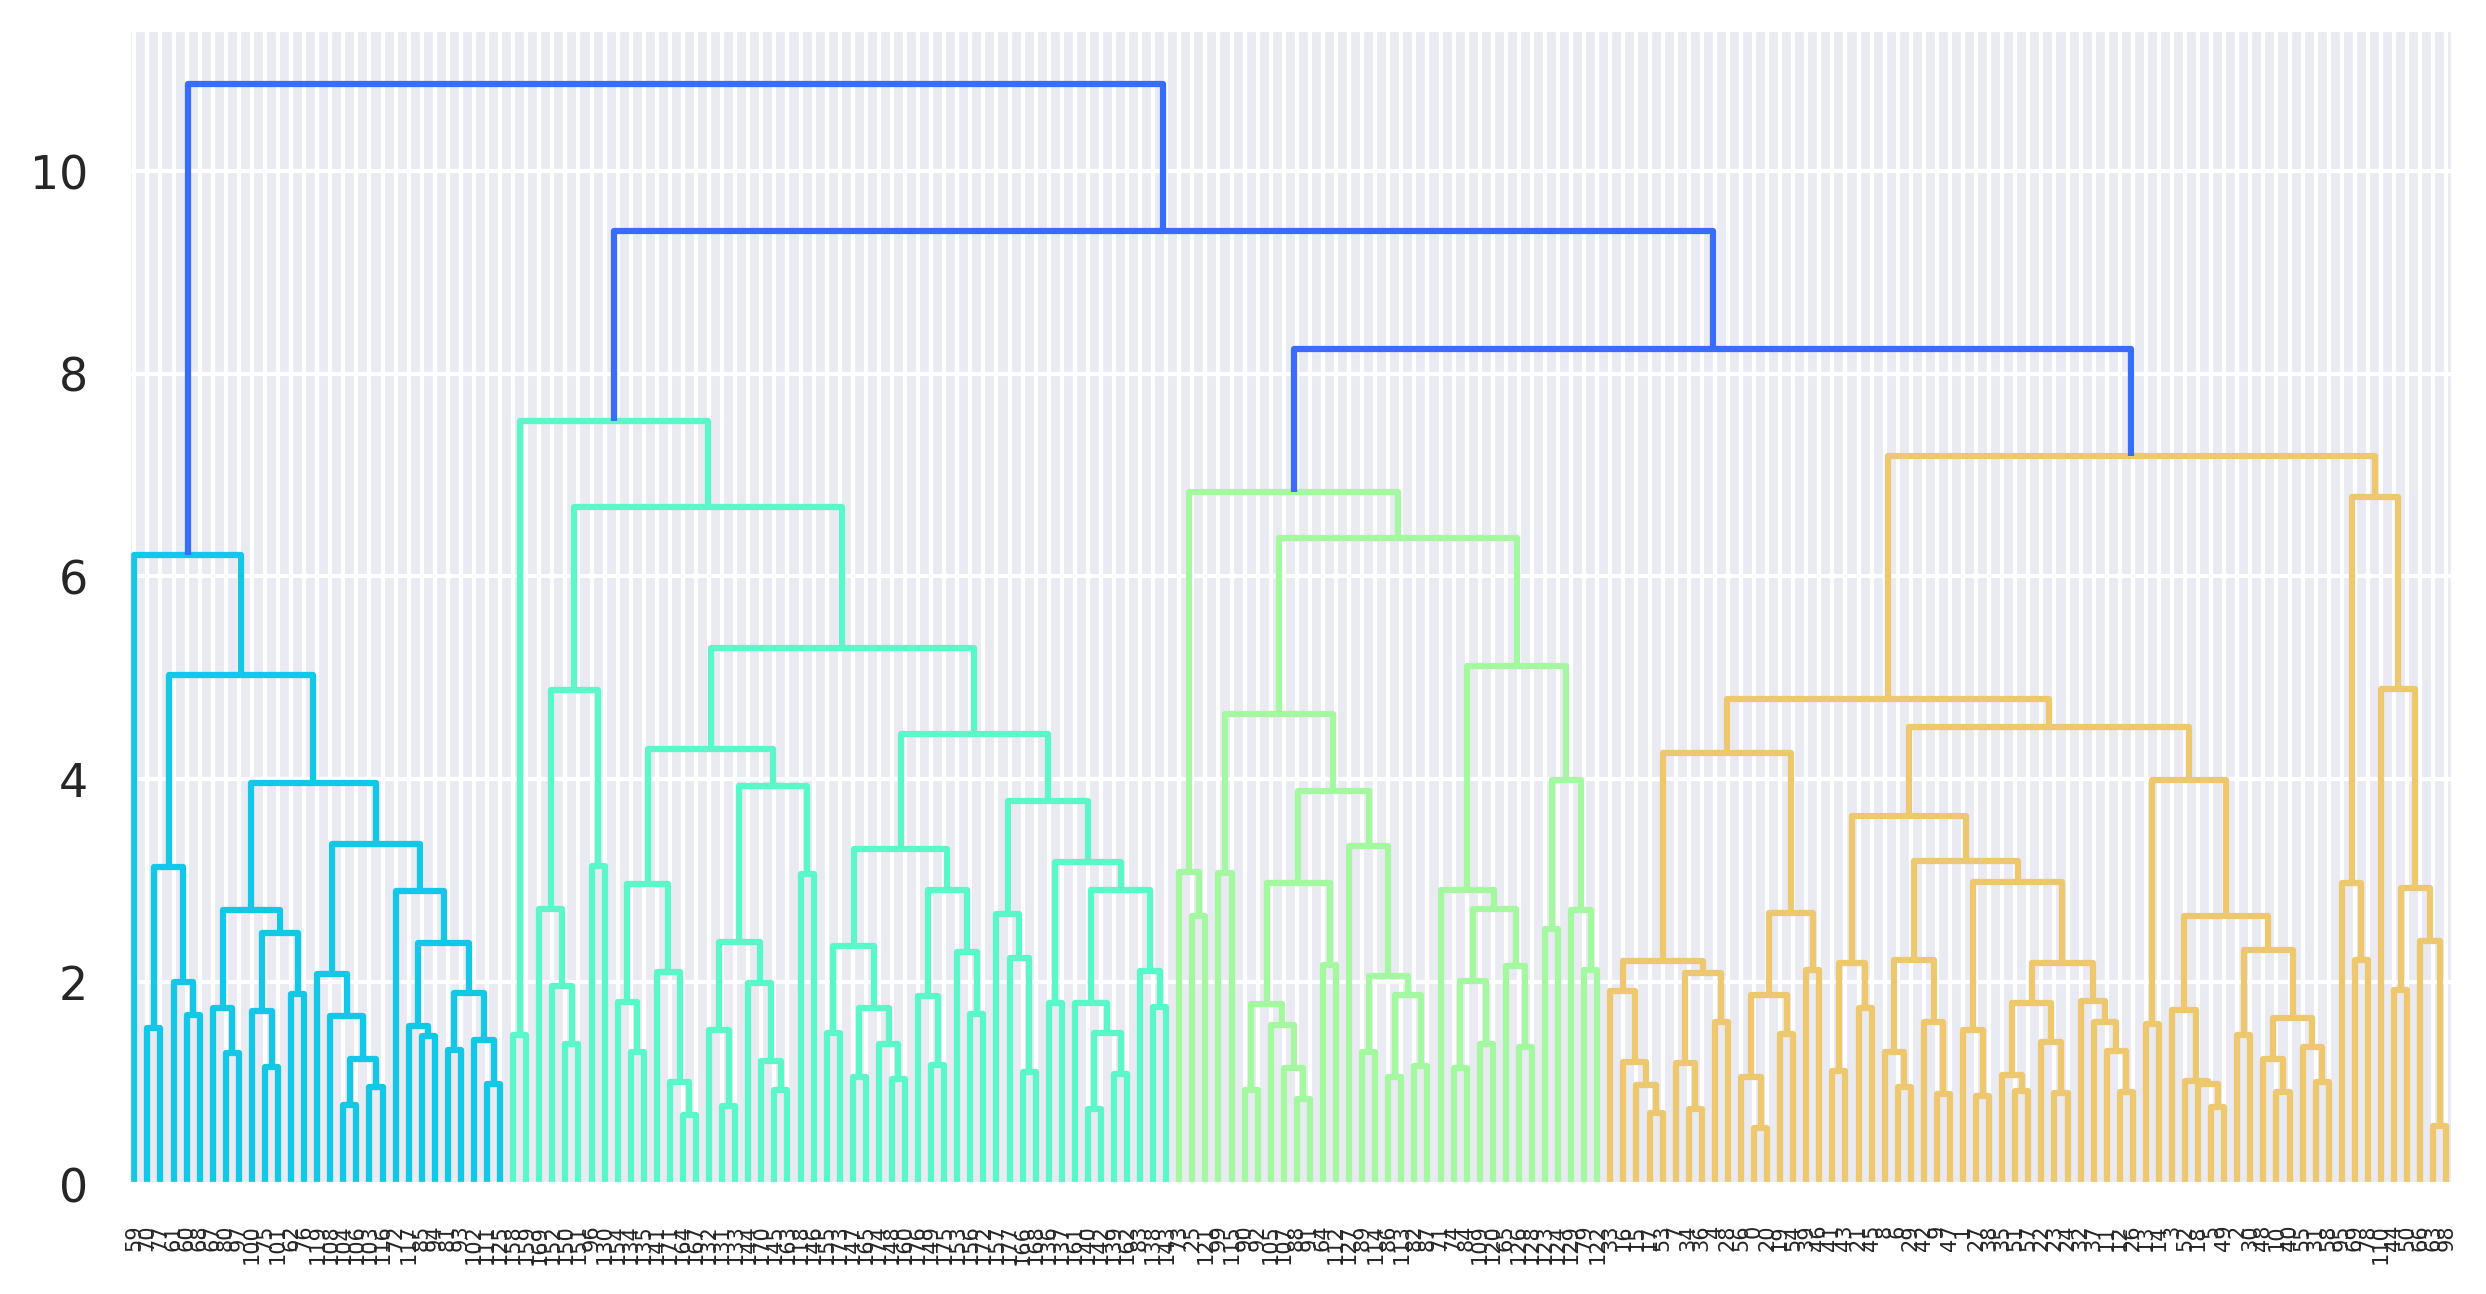

In [ ]:
lk = hierarchy.linkage(x,method='complete')
dendro = hierarchy.dendrogram(lk)

In [ ]:
hc = AgglomerativeClustering(n_clusters=2)
y = hc.fit_predict(x)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [ ]:
df['y'] = y
df

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  y  
0             0.28             2.29   5.64  1.04      3.92     1065  0  
1             0.26             1.28   4.38  1.05      3.40     1050  0  
2             0.30             2.81   5.68  1.03      3.17     1185  0  
3             0.24             2.18   7.80  0.86      3.45     1480  0  
4             0.39             1.82   4.32  1.04      2.93      735  0  
..             ...              ...    ...   ...       ...      ... ..  
173           0.52             1.06   7.70  0.64      1.74      740  1  
174           0.43             1.41   7.30  0.70      1.56      750  1  
175           0.43             1.35  10.20  0.59      1.56      835  1  
176           0.53             1.46   9.30  0.60      1.62      840  1  
177           0.56             1.35   9.20  0.61      1.60      560  1  

[178 rows x 15 columns]

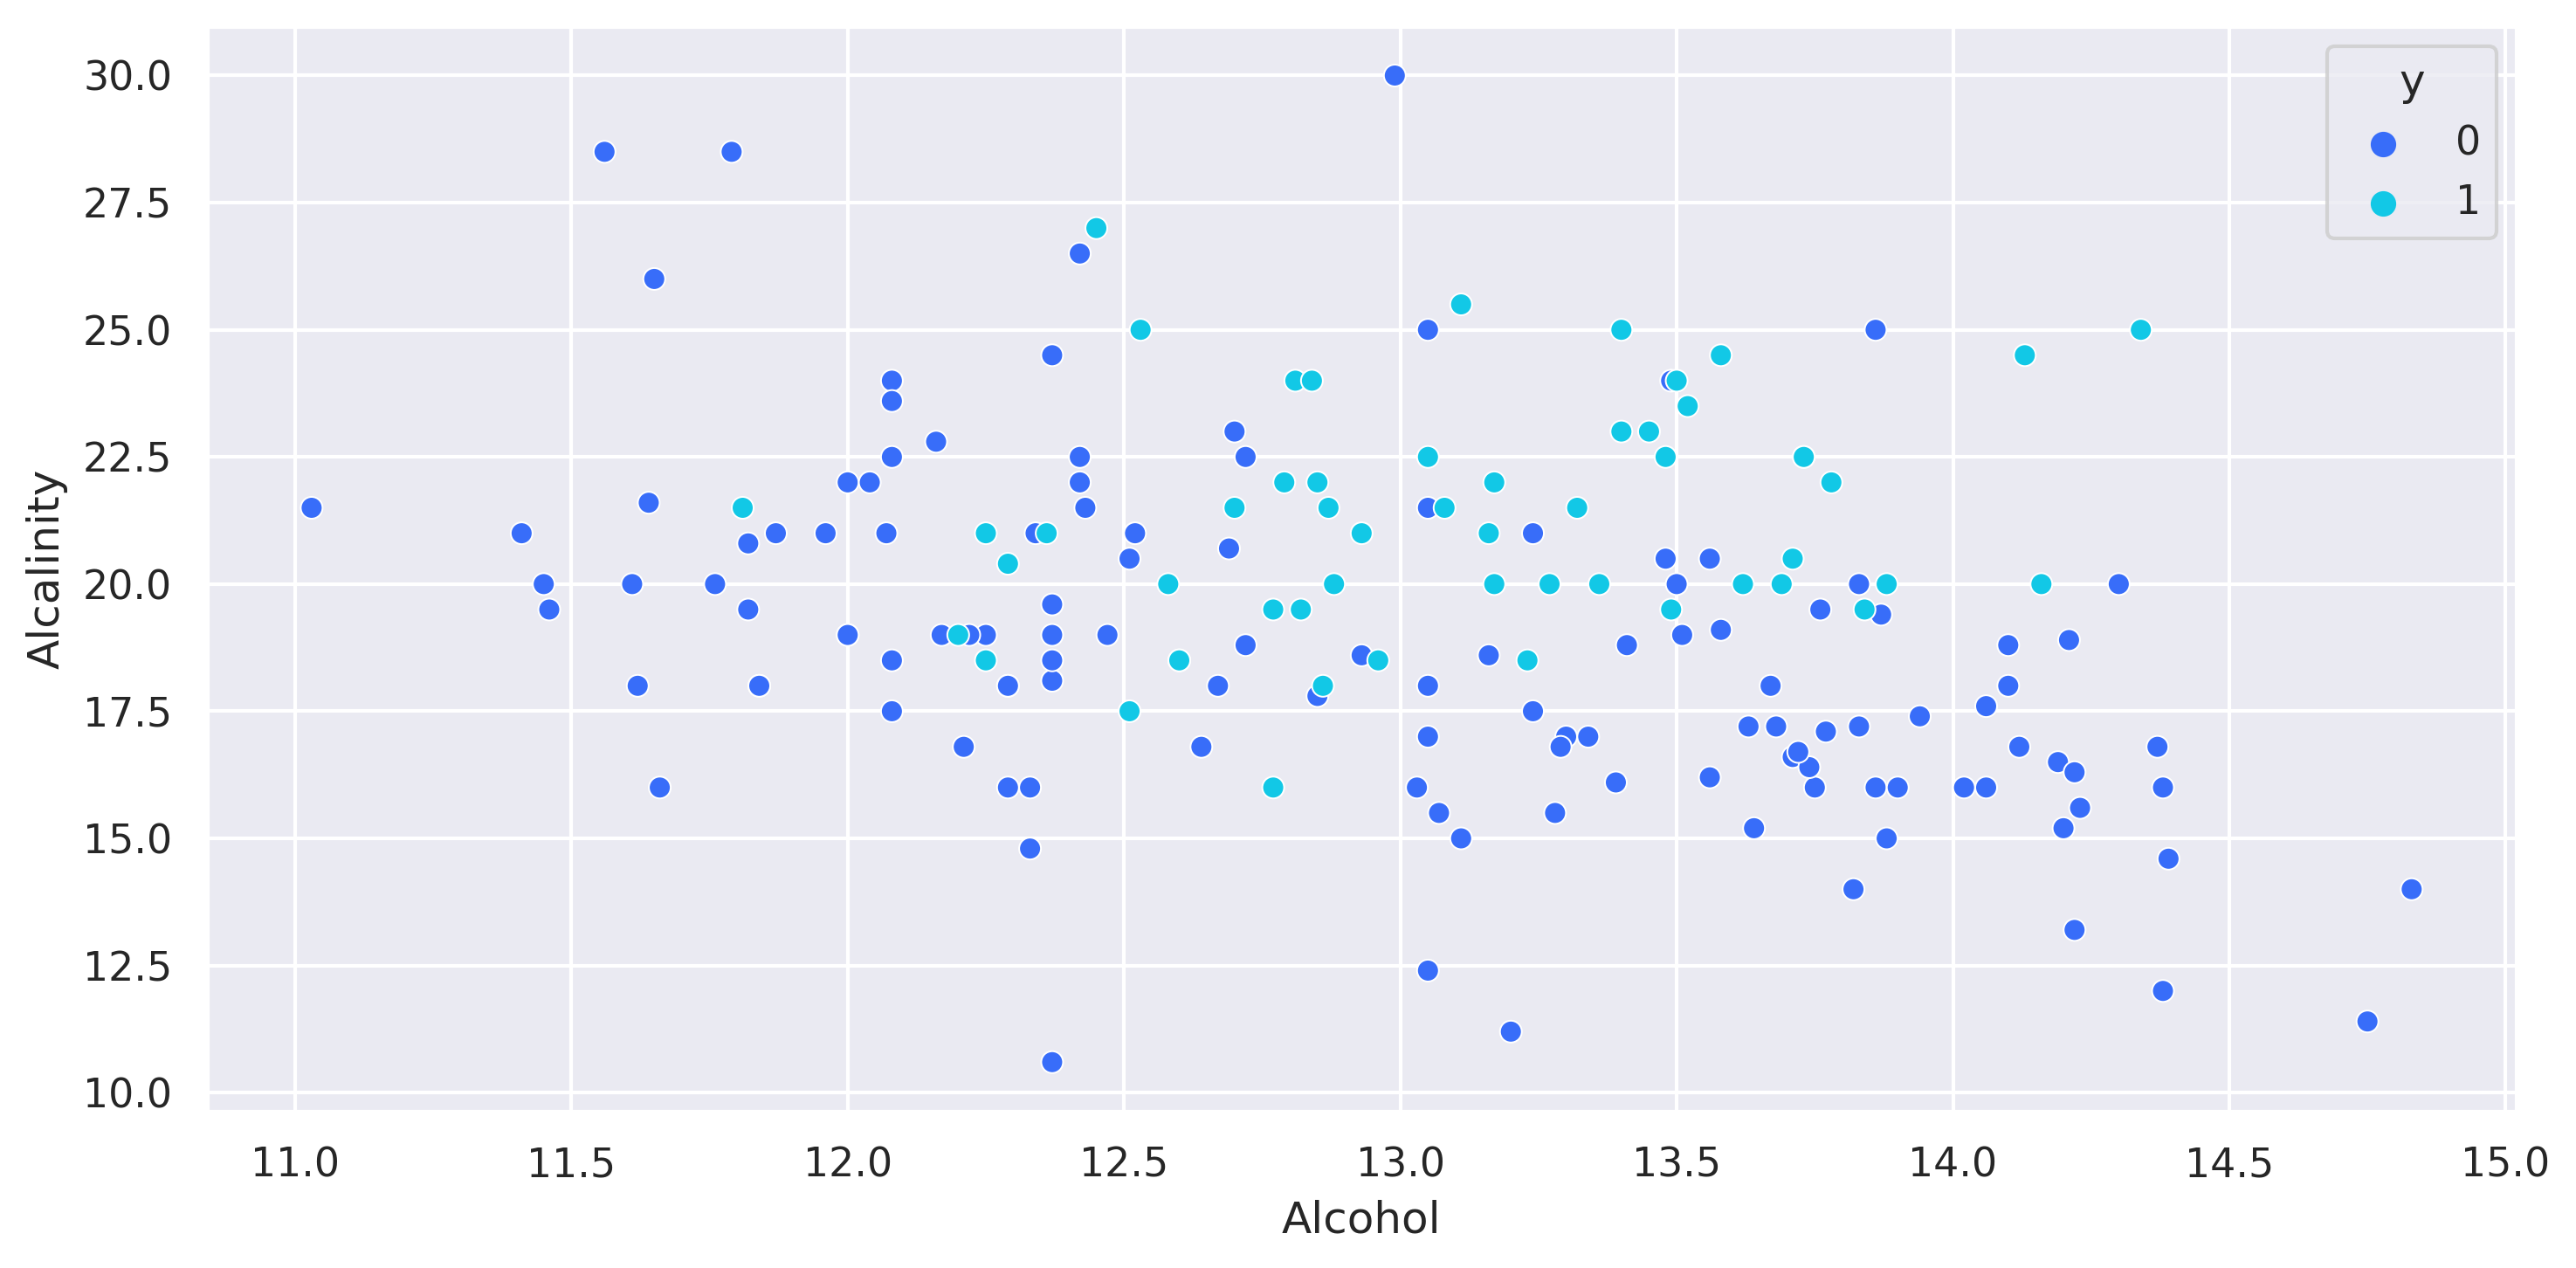

In [ ]:
sns.scatterplot(x=df['Alcohol'],y=df['Alcalinity'],hue = df['y'])
plt.tight_layout()
plt.show()

In [ ]:
#KMeans Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans()
y = km.fit_predict(x)

In [ ]:
#Elbow Curve
wcss = []
for i in range(1,20):
  km = KMeans(n_clusters=i)
  km.fit_predict(x)
  wcss.append(km.inertia_)

In [ ]:
wcss

[2092.191718335536,
 1348.6714895398322,
 1008.4702956652452,
 914.2910262259145,
 847.7258026524173,
 797.6013358304108,
 731.6627042332188,
 685.497447053873,
 646.9862843602773,
 609.0634497473366,
 587.5012673900367,
 544.4618101909606,
 534.0049191679564,
 502.70021855407396,
 485.2525164371835,
 470.06924633224287,
 457.5648672699034,
 437.8091070606048,
 422.7013898420779]

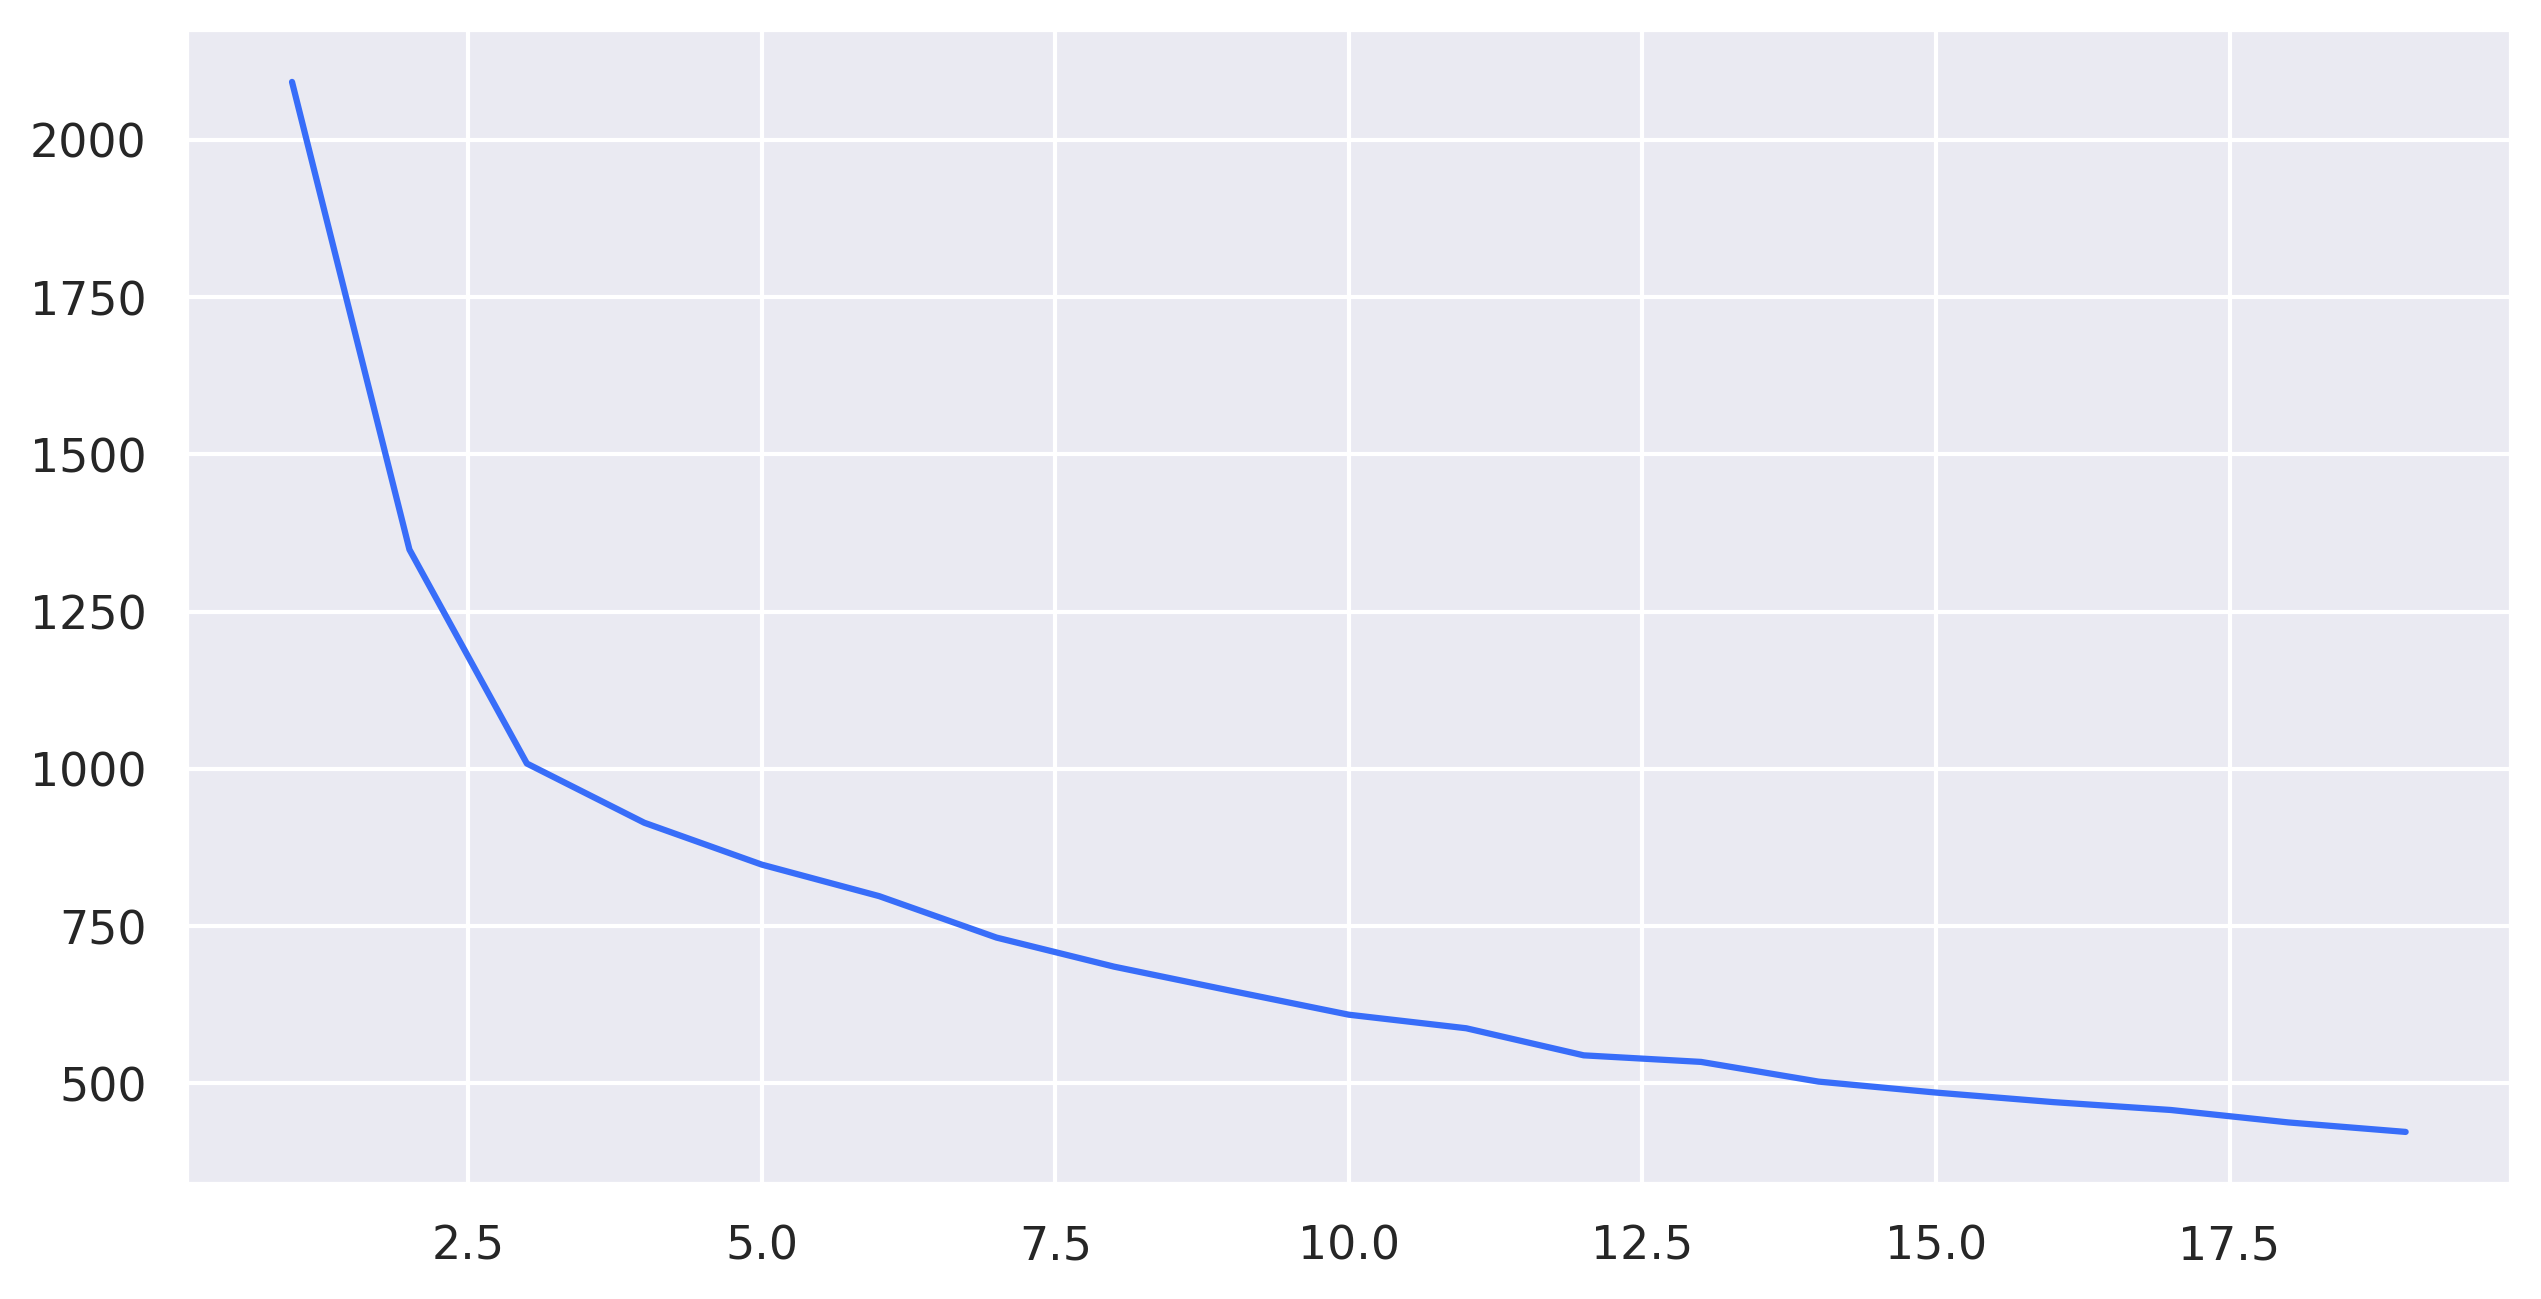

In [ ]:
plt.plot(range(1,20),wcss)

In [307]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [308]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [309]:
lg = LogisticRegression()

In [310]:
lg.fit(xtrain,ytrain)

LogisticRegression()

In [311]:
ypred = lg.predict(xtest)

In [312]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         5
           4       1.00      0.67      0.80         3
           5       0.93      1.00      0.96        13
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         4

    accuracy                           0.97        36
   macro avg       0.99      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36

